In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


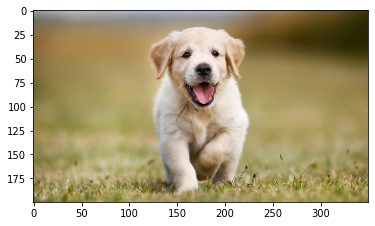

In [36]:
from keras.preprocessing import image
import numpy as np
img_rows, img_cols = 200,350
img = image.load_img('/content/drive/MyDrive/dataset/dog.jpg', target_size=(img_rows,img_cols))
import matplotlib.pyplot as plt
plt.imshow(img)

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# Create a data generator
from keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 3)
num_classes=10
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/jaffedbase/train/',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_train=train_generator.n/train_generator.batch_size

Found 30 images belonging to 10 classes.


In [46]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/dataset/jaffedbase/validate/',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_val=val_generator.n/val_generator.batch_size

Found 29 images belonging to 10 classes.


In [47]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               18874496  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 18,895,178
Trainable params: 18,895,178
Non-trainable params: 0
____________________________________________

In [48]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,epochs=10
                              ,validation_data=val_generator
                              ,validation_steps=step_size_val)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
3/3 [==============================] - 15s 7s/step - loss: 2.3213 - accuracy: 0.1542 - val_loss: 2.3249 - val_accuracy: 0.1034
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 2.3127 - accuracy: 0.1000 - val_loss: 2.3144 - val_accuracy: 0.1034
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 2.3168 - accuracy: 0.1208 - val_loss: 2.3047 - val_accuracy: 0.1034
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 2.2700 - accuracy: 0.1667 - val_loss: 2.2926 - val_accuracy: 0.1034
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 2.2720 - accuracy: 0.0917 - val_loss: 2.2840 - val_accuracy: 0.1034
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 2.2633 - accuracy: 0.1042 - val_loss: 2.2763 - val_accuracy: 0.1034
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 2.2467 - accuracy: 0.1458 - val_loss: 2.2696 - val_accuracy: 0.1034
Epoch 8/10
3/3 [========================

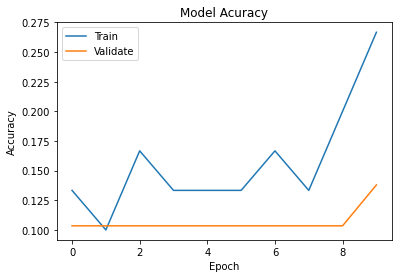

In [49]:
import matplotlib
import matplotlib.pyplot as plt
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

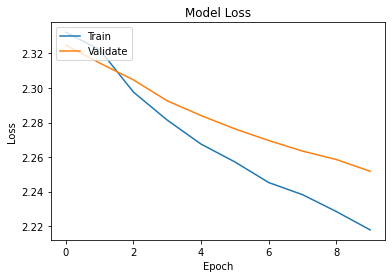

In [50]:
# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()